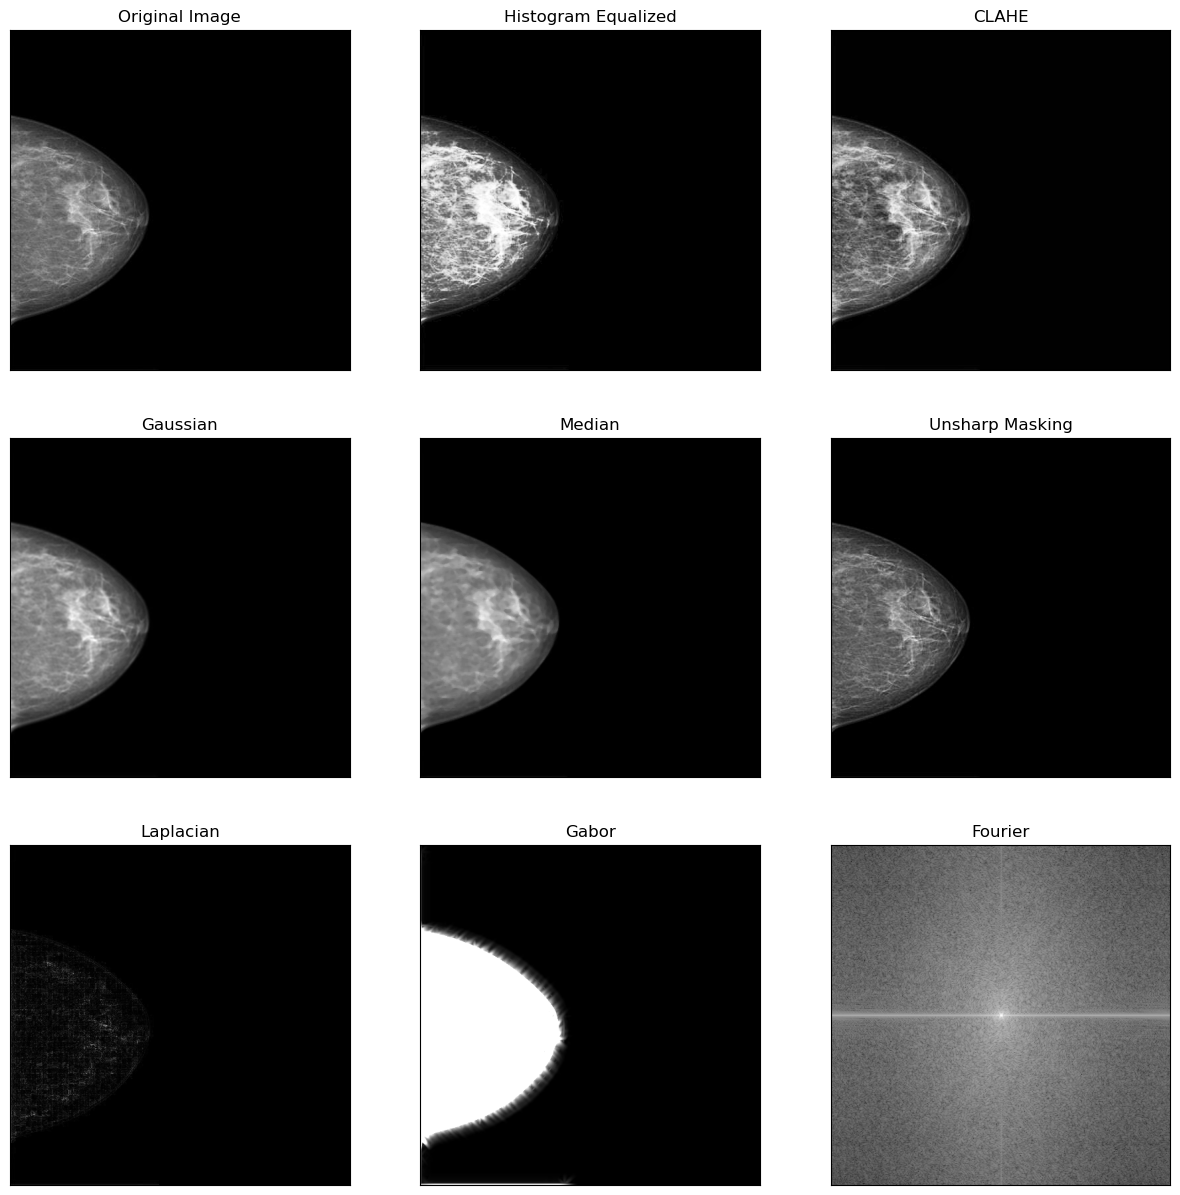

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Görüntüyü yükleme
image_path = r"deneme.jpg"

# Dosya yolunu kontrol etme
if not os.path.exists(image_path):
    print(f"Dosya bulunamadı: {image_path}")
else:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Görüntü yüklenemedi: {image_path}")
    else:
        # Sonuçları kaydedecek klasör
        output_folder = r"C:\Users\bayra\OneDrive\Masaüstü\Önişleme_Deneme"

        # Histogram Eşitleme
        hist_eq = cv2.equalizeHist(image)
        cv2.imwrite(f"{output_folder}\\hist_eq.jpg", hist_eq)

        # Adaptive Histogram Eşitleme (CLAHE)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_img = clahe.apply(image)
        cv2.imwrite(f"{output_folder}\\clahe.jpg", clahe_img)

        # Gaussian Filtresi
        gaussian = cv2.GaussianBlur(image, (5, 5), 0)
        cv2.imwrite(f"{output_folder}\\gaussian.jpg", gaussian)

        # Median Filtresi
        median = cv2.medianBlur(image, 5)
        cv2.imwrite(f"{output_folder}\\median.jpg", median)

        # Unsharp Masking
        blurred = cv2.GaussianBlur(image, (9, 9), 10.0)
        unsharp = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
        cv2.imwrite(f"{output_folder}\\unsharp.jpg", unsharp)

        # Laplacian Filtresi
        laplacian = cv2.Laplacian(image, cv2.CV_64F)
        laplacian = cv2.convertScaleAbs(laplacian)
        cv2.imwrite(f"{output_folder}\\laplacian.jpg", laplacian)

        # Gabor Filtresi
        def build_filters():
            filters = []
            ksize = 31
            for theta in np.arange(0, np.pi, np.pi / 4):
                params = {'ksize': (ksize, ksize), 'sigma': 4.0, 'theta': theta, 'lambd': 10.0,
                          'gamma': 0.5, 'psi': 0, 'ktype': cv2.CV_32F}
                kern = cv2.getGaborKernel(**params)
                filters.append(kern)
            return filters

        def process(img, filters):
            accum = np.zeros_like(img)
            for kern in filters:
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
                np.maximum(accum, fimg, accum)
            return accum

        filters = build_filters()
        gabor_img = process(image, filters)
        cv2.imwrite(f"{output_folder}\\gabor.jpg", gabor_img)

        # Fourier Transform
        dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
        cv2.imwrite(f"{output_folder}\\fourier.jpg", magnitude_spectrum)

        # Sonuçları görselleştirme
        titles = ['Original Image', 'Histogram Equalized', 'CLAHE', 'Gaussian', 'Median', 'Unsharp Masking', 'Laplacian', 'Gabor', 'Fourier']
        images = [image, hist_eq, clahe_img, gaussian, median, unsharp, laplacian, gabor_img, magnitude_spectrum]

        plt.figure(figsize=(15, 15))  # Figür boyutunu ayarlama
        for i in range(len(images)):
            plt.subplot(3, 3, i+1), plt.imshow(images[i], 'gray')
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()


In [6]:
pip install opencv-python-headless
pip install numpy matplotlib
pip install scikit-image

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB 435.7 kB/s eta 0:01:29
   ---------------------------------------- 0.1/38.5 MB 544.7 kB/s eta 0:01:11
   ---------------------------------------- 0.1/38.5 MB 774.0 kB/s eta 0:00:50
   ---------------------------------------- 0.2/38.5 MB 953.7 kB/s eta 0:00:41
   ---------------------------------------- 0.3/38.5 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.5/38.5 MB 1.6 MB/s eta 0:00:25
    --------------------------------------- 0.7/38.5 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.9/38.5 MB 2.2 MB/s eta 0:00:18
   - -------------------------------------- 1.0/38.5 MB 2.2 MB/s eta 0:00:17
   - -------------------------------------- 1.1/38.5 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.2/38.5 MB 2.3 MB/s eta 0:00:17
   - 

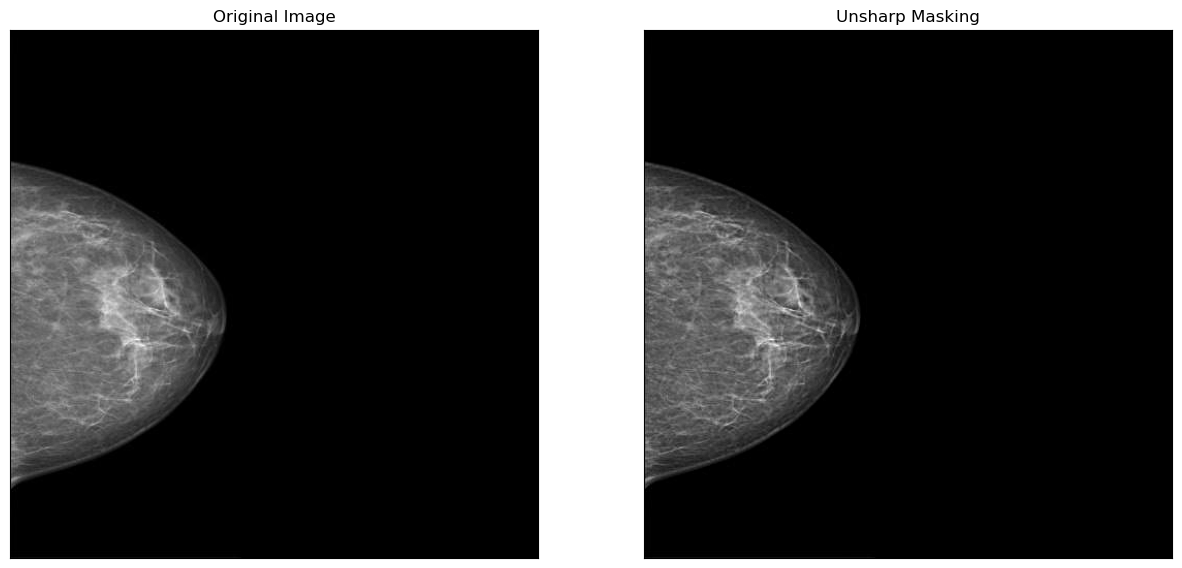

In [28]:
# Sonuçları görselleştirme
titles = ['Original Image', 'Unsharp Masking']
images = [image, unsharp]

plt.figure(figsize=(15, 15))  # Figür boyutunu ayarlama
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


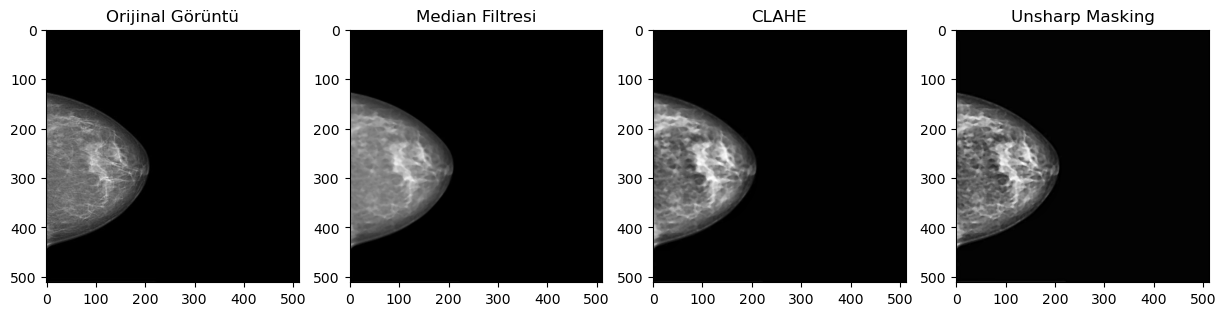

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Resmi yükleme
image_path = "deneme.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Median Filtresi
median = cv2.medianBlur(image, 5)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(median)

# Unsharp Masking
blurred = cv2.GaussianBlur(clahe_img, (9, 9), 10.0)
unsharp = cv2.addWeighted(clahe_img, 1.5, blurred, -0.5, 0)

# Sonuçları görselleştirme
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Orijinal Görüntü')

plt.subplot(1, 4, 2)
plt.imshow(median, cmap='gray')
plt.title('Median Filtresi')

plt.subplot(1, 4, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE')

plt.subplot(1, 4, 4)
plt.imshow(unsharp, cmap='gray')
plt.title('Unsharp Masking')

plt.show()
